# 1) Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 2) Importing Dataframes and Final Data Wrangling

In [2]:
# Importing instacart_full_clean_data.pkl, will assign to variable as df_merged

path = r'/Users/matthewabrams/Desktop/12-28-2021 Instacart Basket Analysis/'
df_merged = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'instacart_full_clean_data.pkl'))
df_merged

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,...,First Name,Last Name,Gender,State,Age,Date Joined,Number of Dependants,Family Status,Income,Missing_First_Name
0,2539329,1,1,2,8,NaN,True,196,1,0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,False
1,2398795,1,2,3,7,15.0,False,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,False
2,473747,1,3,3,12,21.0,False,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,False
3,2254736,1,4,4,7,29.0,False,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,False
4,431534,1,5,4,15,28.0,False,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32433025,156685,106143,26,4,23,5.0,False,19675,1,1,...,Gerald,Yates,Male,Hawaii,25,5/26/2017,0,single,53755,False
32433026,484769,66343,1,6,11,NaN,True,47210,1,0,...,Jacqueline,Arroyo,Female,Tennessee,22,9/12/2017,3,married,46151,False
32433027,1561557,66343,2,1,11,30.0,False,47210,1,1,...,Jacqueline,Arroyo,Female,Tennessee,22,9/12/2017,3,married,46151,False
32433028,276317,66343,3,6,15,19.0,False,47210,1,1,...,Jacqueline,Arroyo,Female,Tennessee,22,9/12/2017,3,married,46151,False


In [3]:
# Importing departments_clean_csv, will assign to variable as df_department

df_department = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'departments_clean_csv'), index_col = False)
df_department.drop(columns = ['Unnamed: 0'], inplace = True)
df_department 

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [4]:
df_merged.columns

Index(['order_id', 'user_id', 'order_number', 'order_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'first_order',
       'product_id', 'add_to_cart_order', 'reordered', 'product_name',
       'aisle_id', 'department_id', 'prices', 'unknown_product_name',
       'price_range', 'busiest_day', 'busiest_period_of_day', 'max_orders',
       'loyalty_flag', 'average_price_products_purchased', 'type_of_spender',
       'median_num_of_days_since_prior_order', 'type_of_customer',
       'First Name', 'Last Name', 'Gender', 'State', 'Age', 'Date Joined',
       'Number of Dependants', 'Family Status', 'Income',
       'Missing_First_Name'],
      dtype='object')

In [5]:
# Exluded observations for customers who made less than 5 orders as instructed by creating a subset dataframe as df_merged_complete
# Exluded First Name, Last Name, and Missing_First_Name columns regarding data privacy
# Replacing numbers represented by day to name of day, ex: 0 = Saturday

df_merged_complete = df_merged[df_merged['max_orders']>=5]
df_merged_complete.drop(columns = ['First Name', 'Last Name', 'Missing_First_Name'], inplace = True)
df_merged_complete['order_day_of_week'].replace({0:'Sat.', 1:'Sun.', 2:'Mon.', 3:'Tues.', 
                                            4:'Wed.', 5:'Thurs.', 6:'Fri.'}, inplace = True)
df_merged_complete

/Users/matthewabrams/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/Users/matthewabrams/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,...,type_of_spender,median_num_of_days_since_prior_order,type_of_customer,Gender,State,Age,Date Joined,Number of Dependants,Family Status,Income
0,2539329,1,1,Mon.,8,NaN,True,196,1,0,...,Low spender,20,Semi-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,Tues.,7,15.0,False,196,1,1,...,Low spender,20,Semi-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,Tues.,12,21.0,False,196,1,1,...,Low spender,20,Semi-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,Wed.,7,29.0,False,196,1,1,...,Low spender,20,Semi-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,Wed.,15,28.0,False,196,1,1,...,Low spender,20,Semi-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32433021,3308056,106143,22,Wed.,20,10.0,False,19675,1,1,...,High spender,7,Frequent customer,Male,Hawaii,25,5/26/2017,0,single,53755
32433022,2988973,106143,23,Mon.,22,5.0,False,19675,1,1,...,High spender,7,Frequent customer,Male,Hawaii,25,5/26/2017,0,single,53755
32433023,930,106143,24,Fri.,12,4.0,False,19675,1,1,...,High spender,7,Frequent customer,Male,Hawaii,25,5/26/2017,0,single,53755
32433024,467253,106143,25,Fri.,16,7.0,False,19675,1,1,...,High spender,7,Frequent customer,Male,Hawaii,25,5/26/2017,0,single,53755


In [6]:
# Merge department csv on df_merged_complete by common identifier: department_id

df_merged_complete = df_merged_complete.merge(df_department, on = 'department_id')
df_merged_complete

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,...,median_num_of_days_since_prior_order,type_of_customer,Gender,State,Age,Date Joined,Number of Dependants,Family Status,Income,department
0,2539329,1,1,Mon.,8,NaN,True,196,1,0,...,20,Semi-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,beverages
1,2398795,1,2,Tues.,7,15.0,False,196,1,1,...,20,Semi-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,beverages
2,473747,1,3,Tues.,12,21.0,False,196,1,1,...,20,Semi-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,beverages
3,2254736,1,4,Wed.,7,29.0,False,196,1,1,...,20,Semi-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,beverages
4,431534,1,5,Wed.,15,28.0,False,196,1,1,...,20,Semi-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,beverages
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30991537,525976,58201,24,Fri.,16,3.0,False,5161,1,1,...,13,Semi-frequent customer,Male,Florida,75,2/8/2019,2,married,138066,bulk
30991538,758290,58201,26,Sat.,12,9.0,False,5161,1,1,...,13,Semi-frequent customer,Male,Florida,75,2/8/2019,2,married,138066,bulk
30991539,460711,58201,27,Fri.,9,13.0,False,5161,1,1,...,13,Semi-frequent customer,Male,Florida,75,2/8/2019,2,married,138066,bulk
30991540,1605789,58201,28,Thurs.,7,27.0,False,5161,1,1,...,13,Semi-frequent customer,Male,Florida,75,2/8/2019,2,married,138066,bulk


In [7]:
df_merged_complete.columns

Index(['order_id', 'user_id', 'order_number', 'order_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'first_order',
       'product_id', 'add_to_cart_order', 'reordered', 'product_name',
       'aisle_id', 'department_id', 'prices', 'unknown_product_name',
       'price_range', 'busiest_day', 'busiest_period_of_day', 'max_orders',
       'loyalty_flag', 'average_price_products_purchased', 'type_of_spender',
       'median_num_of_days_since_prior_order', 'type_of_customer', 'Gender',
       'State', 'Age', 'Date Joined', 'Number of Dependants', 'Family Status',
       'Income', 'department'],
      dtype='object')

# 3) Creating Region column derived from State column

In [8]:
# Printing all state names using the .unique() function

df_merged_complete['State'].unique()

array(['Alabama', 'Indiana', 'Louisiana', 'Montana', 'Oklahoma',
       'Tennessee', 'Iowa', 'Ohio', 'Virginia', 'Connecticut', 'Oregon',
       'South Dakota', 'Kentucky', 'Michigan', 'New Jersey', 'Hawaii',
       'Minnesota', 'Illinois', 'Idaho', 'Kansas', 'North Carolina',
       'Vermont', 'Delaware', 'Nebraska', 'Nevada', 'Arkansas', 'Georgia',
       'District of Columbia', 'Utah', 'Alaska', 'Colorado', 'Florida',
       'Rhode Island', 'Maine', 'South Carolina', 'Washington',
       'Mississippi', 'California', 'Texas', 'Arizona', 'New Mexico',
       'Maryland', 'Missouri', 'Wyoming', 'New Hampshire',
       'Massachusetts', 'Pennsylvania', 'Wisconsin', 'West Virginia',
       'North Dakota', 'New York'], dtype=object)

In [9]:
# Assigning state names as a list to each region 

northeast = ['Maine', 'New Hampshire','Vermont', 'Massachusetts', 'Rhode Island', 
             'Connecticut', 'New York', 'Pennsylvania','New Jersey']
midwest = ['Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota',
           'South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri']
south =['Delaware','Maryland','District of Columbia','Virginia', 'West Virginia', 
        'North Carolina','South Carolina','Georgia','Florida','Kentucky','Tennessee',
        'Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']
west = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico',
        'Alaska','Washington','Oregon','California','Hawaii']

In [10]:
# Creating new column 'Region' derived from values of State column.
# Ex: If state is New York (.isin(northeast)), then region is Northeast

df_merged_complete.loc[df_merged_complete['State'].isin(northeast), 'Region'] = 'Northeast'
df_merged_complete.loc[df_merged_complete['State'].isin(midwest), 'Region'] = 'Midwest'
df_merged_complete.loc[df_merged_complete['State'].isin(south), 'Region'] = 'South'
df_merged_complete.loc[df_merged_complete['State'].isin(west), 'Region'] = 'West'
df_merged_complete

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,...,type_of_customer,Gender,State,Age,Date Joined,Number of Dependants,Family Status,Income,department,Region
0,2539329,1,1,Mon.,8,NaN,True,196,1,0,...,Semi-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,beverages,South
1,2398795,1,2,Tues.,7,15.0,False,196,1,1,...,Semi-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,beverages,South
2,473747,1,3,Tues.,12,21.0,False,196,1,1,...,Semi-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,beverages,South
3,2254736,1,4,Wed.,7,29.0,False,196,1,1,...,Semi-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,beverages,South
4,431534,1,5,Wed.,15,28.0,False,196,1,1,...,Semi-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,beverages,South
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30991537,525976,58201,24,Fri.,16,3.0,False,5161,1,1,...,Semi-frequent customer,Male,Florida,75,2/8/2019,2,married,138066,bulk,South
30991538,758290,58201,26,Sat.,12,9.0,False,5161,1,1,...,Semi-frequent customer,Male,Florida,75,2/8/2019,2,married,138066,bulk,South
30991539,460711,58201,27,Fri.,9,13.0,False,5161,1,1,...,Semi-frequent customer,Male,Florida,75,2/8/2019,2,married,138066,bulk,South
30991540,1605789,58201,28,Thurs.,7,27.0,False,5161,1,1,...,Semi-frequent customer,Male,Florida,75,2/8/2019,2,married,138066,bulk,South


In [11]:
# Creating a part of day column derived from order_hour_of_day column
# Early Morning is from 12 am to 8 am 
# Day Time is from 8 am to 5 pm
# Night Time is from 5 pm to 12 am 

result = []

for value in df_merged_complete['order_hour_of_day']:
    if (value >= 0 and value < 8):
        result.append('Early Morning')
    elif (value >= 8 and value < 17):
        result.append('Day Time')
    else:
        result.append('Night Time')
        
df_merged_complete['Part of Day'] = result

df_merged_complete

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,...,Gender,State,Age,Date Joined,Number of Dependants,Family Status,Income,department,Region,Part of Day
0,2539329,1,1,Mon.,8,NaN,True,196,1,0,...,Female,Alabama,31,2/17/2019,3,married,40423,beverages,South,Day Time
1,2398795,1,2,Tues.,7,15.0,False,196,1,1,...,Female,Alabama,31,2/17/2019,3,married,40423,beverages,South,Early Morning
2,473747,1,3,Tues.,12,21.0,False,196,1,1,...,Female,Alabama,31,2/17/2019,3,married,40423,beverages,South,Day Time
3,2254736,1,4,Wed.,7,29.0,False,196,1,1,...,Female,Alabama,31,2/17/2019,3,married,40423,beverages,South,Early Morning
4,431534,1,5,Wed.,15,28.0,False,196,1,1,...,Female,Alabama,31,2/17/2019,3,married,40423,beverages,South,Day Time
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30991537,525976,58201,24,Fri.,16,3.0,False,5161,1,1,...,Male,Florida,75,2/8/2019,2,married,138066,bulk,South,Day Time
30991538,758290,58201,26,Sat.,12,9.0,False,5161,1,1,...,Male,Florida,75,2/8/2019,2,married,138066,bulk,South,Day Time
30991539,460711,58201,27,Fri.,9,13.0,False,5161,1,1,...,Male,Florida,75,2/8/2019,2,married,138066,bulk,South,Day Time
30991540,1605789,58201,28,Thurs.,7,27.0,False,5161,1,1,...,Male,Florida,75,2/8/2019,2,married,138066,bulk,South,Early Morning


In [12]:
# Assigning certain days to weekday and weekend

weekday = ['Mon.', 'Tues.', 'Wed.', 'Thurs.', 'Fri.']
weekend = ['Sat.', 'Sun.']

In [13]:
df_merged_complete.loc[(df_merged_complete['order_day_of_week'].isin(weekday)), 'Type of Day'] = 'Weekday'
df_merged_complete.loc[(df_merged_complete['order_day_of_week'].isin(weekend)), 'Type of Day'] = 'Weekend'
df_merged_complete

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,...,State,Age,Date Joined,Number of Dependants,Family Status,Income,department,Region,Part of Day,Type of Day
0,2539329,1,1,Mon.,8,NaN,True,196,1,0,...,Alabama,31,2/17/2019,3,married,40423,beverages,South,Day Time,Weekday
1,2398795,1,2,Tues.,7,15.0,False,196,1,1,...,Alabama,31,2/17/2019,3,married,40423,beverages,South,Early Morning,Weekday
2,473747,1,3,Tues.,12,21.0,False,196,1,1,...,Alabama,31,2/17/2019,3,married,40423,beverages,South,Day Time,Weekday
3,2254736,1,4,Wed.,7,29.0,False,196,1,1,...,Alabama,31,2/17/2019,3,married,40423,beverages,South,Early Morning,Weekday
4,431534,1,5,Wed.,15,28.0,False,196,1,1,...,Alabama,31,2/17/2019,3,married,40423,beverages,South,Day Time,Weekday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30991537,525976,58201,24,Fri.,16,3.0,False,5161,1,1,...,Florida,75,2/8/2019,2,married,138066,bulk,South,Day Time,Weekday
30991538,758290,58201,26,Sat.,12,9.0,False,5161,1,1,...,Florida,75,2/8/2019,2,married,138066,bulk,South,Day Time,Weekend
30991539,460711,58201,27,Fri.,9,13.0,False,5161,1,1,...,Florida,75,2/8/2019,2,married,138066,bulk,South,Day Time,Weekday
30991540,1605789,58201,28,Thurs.,7,27.0,False,5161,1,1,...,Florida,75,2/8/2019,2,married,138066,bulk,South,Early Morning,Weekday


# 5) Creating profile variable derived from customer personal information


In [14]:
# Statistic description of salary

df_merged_complete['Income'].describe()

count    3.099154e+07
mean     9.967335e+04
std      4.313946e+04
min      2.590300e+04
25%      6.728900e+04
50%      9.676500e+04
75%      1.281010e+05
max      5.939010e+05
Name: Income, dtype: float64

In [15]:
# Unique function to return the types of family status

df_merged_complete['Family Status'].unique()

array(['married', 'divorced/widowed', 'single',
       'living with parents and siblings'], dtype=object)

In [16]:
# Statistic description of age

df_merged_complete['Age'].describe()

count    3.099154e+07
mean     4.946796e+01
std      1.848522e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: Age, dtype: float64

In [17]:
# Created Type of Adult column derived from two columns: Family Status and Income

df_merged_complete.loc[(df_merged_complete['Family Status'] == 'single') & (df_merged_complete['Income'] < 50000), 'Type of Adult'] = 'Single Working Class Adult'
df_merged_complete.loc[(df_merged_complete['Family Status'] == 'single') & ((df_merged_complete['Income'] >= 50000)&(df_merged_complete['Income'] < 100000)), 'Type of Adult'] = 'Single Middle Class Adult'
df_merged_complete.loc[(df_merged_complete['Family Status'] == 'single') & (df_merged_complete['Income'] >= 100000), 'Type of Adult'] = 'Single Upper Class Adult'

df_merged_complete.loc[(df_merged_complete['Family Status'] == 'married') & (df_merged_complete['Income'] < 50000), 'Type of Adult'] = 'Married Working Class Adult'
df_merged_complete.loc[(df_merged_complete['Family Status'] == 'married') & ((df_merged_complete['Income'] >= 50000) & (df_merged_complete['Income'] < 100000)), 'Type of Adult'] = 'Married Middle Class Adult'
df_merged_complete.loc[(df_merged_complete['Family Status'] == 'married') & (df_merged_complete['Income'] >= 100000), 'Type of Adult'] = 'Married Upper Class Adult'


df_merged_complete.loc[(df_merged_complete['Family Status'] == 'divorced/widowed') & (df_merged_complete['Income'] < 50000), 'Type of Adult'] = 'Divorced/Widowed Working Class Adult'
df_merged_complete.loc[(df_merged_complete['Family Status'] == 'divorced/widowed') & ((df_merged_complete['Income'] >= 50000) & (df_merged_complete['Income'] < 100000)), 'Type of Adult'] = 'Divorced/Widowed Middle Class Adult'
df_merged_complete.loc[(df_merged_complete['Family Status'] == 'divorced/widowed') & (df_merged_complete['Income'] >= 100000), 'Type of Adult'] = 'Divorced/Widowed Upper Class Adult'


df_merged_complete.loc[(df_merged_complete['Family Status'] == 'living with parents and siblings') & (df_merged_complete['Income'] < 50000), 'Type of Adult'] = 'Dependant Working Class Adult'
df_merged_complete.loc[(df_merged_complete['Family Status'] == 'living with parents and siblings') & ((df_merged_complete['Income'] >= 50000) & (df_merged_complete['Income'] < 100000)), 'Type of Adult'] = 'Dependant Middle Class Adult'
df_merged_complete.loc[(df_merged_complete['Family Status'] == 'living with parents and siblings') & (df_merged_complete['Income'] >= 100000), 'Type of Adult'] = 'Dependant Upper Class Adult'


df_merged_complete

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,...,Age,Date Joined,Number of Dependants,Family Status,Income,department,Region,Part of Day,Type of Day,Type of Adult
0,2539329,1,1,Mon.,8,NaN,True,196,1,0,...,31,2/17/2019,3,married,40423,beverages,South,Day Time,Weekday,Married Working Class Adult
1,2398795,1,2,Tues.,7,15.0,False,196,1,1,...,31,2/17/2019,3,married,40423,beverages,South,Early Morning,Weekday,Married Working Class Adult
2,473747,1,3,Tues.,12,21.0,False,196,1,1,...,31,2/17/2019,3,married,40423,beverages,South,Day Time,Weekday,Married Working Class Adult
3,2254736,1,4,Wed.,7,29.0,False,196,1,1,...,31,2/17/2019,3,married,40423,beverages,South,Early Morning,Weekday,Married Working Class Adult
4,431534,1,5,Wed.,15,28.0,False,196,1,1,...,31,2/17/2019,3,married,40423,beverages,South,Day Time,Weekday,Married Working Class Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30991537,525976,58201,24,Fri.,16,3.0,False,5161,1,1,...,75,2/8/2019,2,married,138066,bulk,South,Day Time,Weekday,Married Upper Class Adult
30991538,758290,58201,26,Sat.,12,9.0,False,5161,1,1,...,75,2/8/2019,2,married,138066,bulk,South,Day Time,Weekend,Married Upper Class Adult
30991539,460711,58201,27,Fri.,9,13.0,False,5161,1,1,...,75,2/8/2019,2,married,138066,bulk,South,Day Time,Weekday,Married Upper Class Adult
30991540,1605789,58201,28,Thurs.,7,27.0,False,5161,1,1,...,75,2/8/2019,2,married,138066,bulk,South,Early Morning,Weekday,Married Upper Class Adult


In [18]:
df_merged_complete.loc[df_merged_complete['Income'] < 50000, 'Income Range'] = 'Low Income'
df_merged_complete.loc[(df_merged_complete['Income'] >= 50000) & (df_merged_complete['Income'] < 100000), 'Income Range'] = 'Middle Income'
df_merged_complete.loc[df_merged_complete['Income'] >= 100000, 'Income Range'] = 'High Income'
df_merged_complete

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,...,Date Joined,Number of Dependants,Family Status,Income,department,Region,Part of Day,Type of Day,Type of Adult,Income Range
0,2539329,1,1,Mon.,8,NaN,True,196,1,0,...,2/17/2019,3,married,40423,beverages,South,Day Time,Weekday,Married Working Class Adult,Low Income
1,2398795,1,2,Tues.,7,15.0,False,196,1,1,...,2/17/2019,3,married,40423,beverages,South,Early Morning,Weekday,Married Working Class Adult,Low Income
2,473747,1,3,Tues.,12,21.0,False,196,1,1,...,2/17/2019,3,married,40423,beverages,South,Day Time,Weekday,Married Working Class Adult,Low Income
3,2254736,1,4,Wed.,7,29.0,False,196,1,1,...,2/17/2019,3,married,40423,beverages,South,Early Morning,Weekday,Married Working Class Adult,Low Income
4,431534,1,5,Wed.,15,28.0,False,196,1,1,...,2/17/2019,3,married,40423,beverages,South,Day Time,Weekday,Married Working Class Adult,Low Income
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30991537,525976,58201,24,Fri.,16,3.0,False,5161,1,1,...,2/8/2019,2,married,138066,bulk,South,Day Time,Weekday,Married Upper Class Adult,High Income
30991538,758290,58201,26,Sat.,12,9.0,False,5161,1,1,...,2/8/2019,2,married,138066,bulk,South,Day Time,Weekend,Married Upper Class Adult,High Income
30991539,460711,58201,27,Fri.,9,13.0,False,5161,1,1,...,2/8/2019,2,married,138066,bulk,South,Day Time,Weekday,Married Upper Class Adult,High Income
30991540,1605789,58201,28,Thurs.,7,27.0,False,5161,1,1,...,2/8/2019,2,married,138066,bulk,South,Early Morning,Weekday,Married Upper Class Adult,High Income


# 6) Finalizing Dataframe before analysis and export

In [19]:
# Arranging order of dataframe columns before export

df_merged_complete = df_merged_complete[['user_id','Gender', 'Age', 'State', 'Number of Dependants', 'Family Status',
       'Income','Income Range', 'Type of Adult', 'Region','Date Joined','loyalty_flag','type_of_customer', 
       'type_of_spender','order_id', 'order_number', 'first_order','days_since_prior_order','median_num_of_days_since_prior_order', 'max_orders',
        'add_to_cart_order', 'reordered', 'order_day_of_week', 'Type of Day', 'busiest_day','order_hour_of_day','Part of Day', 'busiest_period_of_day',
       'product_id', 'product_name', 'unknown_product_name', 'prices', 'price_range', 'average_price_products_purchased', 'aisle_id','department_id', 'department' 
      ]]
df_merged_complete

,user_id,Gender,Age,State,Number of Dependants,Family Status,Income,Income Range,Type of Adult,Region,...,busiest_period_of_day,product_id,product_name,unknown_product_name,prices,price_range,average_price_products_purchased,aisle_id,department_id,department
0,1,Female,31,Alabama,3,married,40423,Low Income,Married Working Class Adult,South,...,Average orders,196,Soda,False,9.0,Mid-range product,6.37,77,7,beverages
1,1,Female,31,Alabama,3,married,40423,Low Income,Married Working Class Adult,South,...,Average orders,196,Soda,False,9.0,Mid-range product,6.37,77,7,beverages
2,1,Female,31,Alabama,3,married,40423,Low Income,Married Working Class Adult,South,...,Most orders,196,Soda,False,9.0,Mid-range product,6.37,77,7,beverages
3,1,Female,31,Alabama,3,married,40423,Low Income,Married Working Class Adult,South,...,Average orders,196,Soda,False,9.0,Mid-range product,6.37,77,7,beverages
4,1,Female,31,Alabama,3,married,40423,Low Income,Married Working Class Adult,South,...,Most orders,196,Soda,False,9.0,Mid-range product,6.37,77,7,beverages
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30991537,58201,Male,75,Florida,2,married,138066,High Income,Married Upper Class Adult,South,...,Most orders,5161,Dried Mango,False,6.1,Mid-range product,7.69,18,10,bulk
30991538,58201,Male,75,Florida,2,married,138066,High Income,Married Upper Class Adult,South,...,Most orders,5161,Dried Mango,False,6.1,Mid-range product,7.69,18,10,bulk
30991539,58201,Male,75,Florida,2,married,138066,High Income,Married Upper Class Adult,South,...,Most orders,5161,Dried Mango,False,6.1,Mid-range product,7.69,18,10,bulk
30991540,58201,Male,75,Florida,2,married,138066,High Income,Married Upper Class Adult,South,...,Average orders,5161,Dried Mango,False,6.1,Mid-range product,7.69,18,10,bulk


# 7) Analysis on amount customers spend

<AxesSubplot:title={'center':'Income vs Customer Age'}, xlabel='Age', ylabel='Income'>

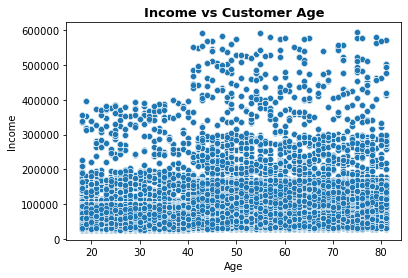

In [20]:
# Creating a scatter plot to find relationship between age of customers and income of customers
# People of higher age tend to have higher income

scatter = sns.scatterplot(data = df_merged_complete, x = 'Age', y = 'Income')
plt.title('Income vs Customer Age', fontsize = 13, fontweight = 'bold')
scatter

In [21]:
# aggregated average amount spent grouped by customer age
avg_price = df_merged_complete.groupby('Age').agg({'prices':['mean']}).round(2)
avg_price

,prices
,mean
Age,
18,7.81
19,7.81
20,7.78
21,7.79
22,7.79
...,...
77,7.76
78,7.82


([<matplotlib.axis.YTick at 0x7fd9f8da5730>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

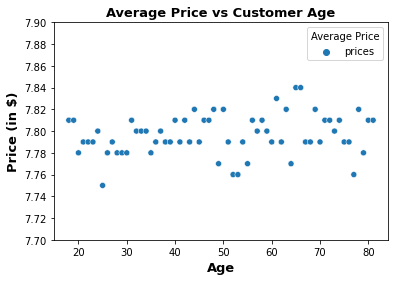

In [22]:
# Scatter plot between age of customers and average price spent by customer
# There appears to be a weak relationship between the age of customers and average price spent by customer.

scatter_1 = sns.scatterplot(data = avg_price)
plt.title('Average Price vs Customer Age', fontsize = 13, fontweight = 'bold')
plt.xlabel('Age', fontsize = 13, fontweight = 'bold')
plt.ylabel('Price (in $)', fontsize = 13, fontweight = 'bold')
y_ticks = np.arange(7.70, 7.91, 0.02)
plt.legend(title = 'Average Price')
plt.yticks(y_ticks, rotation = 0)

In [23]:
# On average, adults with high income spend more money on products than adults with low income

df_merged_complete.groupby('Type of Adult')['prices'].mean().round(2).sort_values(ascending = False)

Type of Adult
Dependant Middle Class Adult            7.96
Divorced/Widowed Upper Class Adult      7.96
Married Upper Class Adult               7.96
Single Upper Class Adult                7.95
Dependant Upper Class Adult             7.94
Single Middle Class Adult               7.92
Married Middle Class Adult              7.88
Divorced/Widowed Middle Class Adult     7.79
Dependant Working Class Adult           6.91
Single Working Class Adult              6.79
Married Working Class Adult             6.69
Divorced/Widowed Working Class Adult    6.53
Name: prices, dtype: float64

# 8) Analysis on which departments are popular

Text(0.5, 1.0, 'Number of Ordered Products From Top 5 Departments')

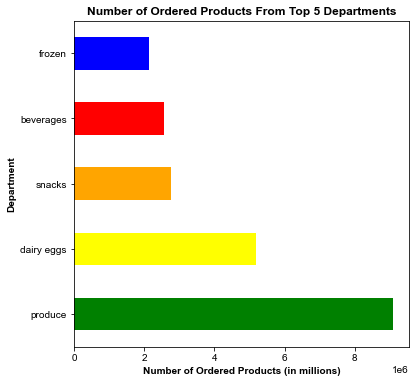

In [24]:
# Bar graph of top 5 departmarts with the most frequent product orders
# Top departments are Produce, Dairy/Eggs, Snacks, Beverages, Frozen

top_5_depart = df_merged_complete['department'].value_counts().nlargest(5).plot.barh(figsize = (6,6), color = ['green', 'yellow', 'orange', 'red', 'blue'])
sns.set_style('ticks')
plt.xlabel('Number of Ordered Products (in millions)', fontsize = 10, fontweight = 'bold')
plt.ylabel('Department', fontsize = 10, fontweight = 'bold')
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.title('Number of Ordered Products From Top 5 Departments', fontsize = 12, fontweight = 'bold')

In [25]:
# Returning the top 5 departments by proportion of products purchased ordered by Region 

In [26]:
# Number of products ordered in department purchased in the south divided by the total number of ordered products altogther in the south

((df_merged_complete[df_merged_complete['Region']=='South']['department'].value_counts()) / len(df_merged_complete[df_merged_complete['Region']=='South'])).round(2)

produce            0.29
dairy eggs         0.17
snacks             0.09
beverages          0.08
frozen             0.07
pantry             0.06
bakery             0.04
canned goods       0.03
deli               0.03
dry goods pasta    0.03
household          0.02
breakfast          0.02
meat seafood       0.02
personal care      0.01
babies             0.01
international      0.01
alcohol            0.00
pets               0.00
missing            0.00
other              0.00
bulk               0.00
Name: department, dtype: float64

In [27]:
# Number of products ordered in department purchased in the notheast divided by the total number of ordered products altogther in the northeast

((df_merged_complete[df_merged_complete['Region']=='Northeast']['department'].value_counts()) / len(df_merged_complete[df_merged_complete['Region']=='Northeast'])).round(2)

produce            0.29
dairy eggs         0.17
snacks             0.09
beverages          0.08
frozen             0.07
pantry             0.06
bakery             0.04
deli               0.03
canned goods       0.03
dry goods pasta    0.03
household          0.02
breakfast          0.02
meat seafood       0.02
personal care      0.01
babies             0.01
international      0.01
alcohol            0.00
pets               0.00
missing            0.00
other              0.00
bulk               0.00
Name: department, dtype: float64

In [28]:
# Number of products ordered in department purchased in the midwest divided by the total number of ordered products altogther in the midwest

((df_merged_complete[df_merged_complete['Region']=='Midwest']['department'].value_counts()) / len(df_merged_complete[df_merged_complete['Region']=='Midwest'])).round(2)

produce            0.29
dairy eggs         0.17
snacks             0.09
beverages          0.08
frozen             0.07
pantry             0.06
bakery             0.04
canned goods       0.03
deli               0.03
dry goods pasta    0.03
household          0.02
meat seafood       0.02
breakfast          0.02
personal care      0.01
babies             0.01
international      0.01
alcohol            0.00
pets               0.00
missing            0.00
other              0.00
bulk               0.00
Name: department, dtype: float64

In [29]:
# Number of products ordered in department purchased in the west divided by the total number of ordered products altogther in the west

((df_merged_complete[df_merged_complete['Region']=='West']['department'].value_counts()) / len(df_merged_complete[df_merged_complete['Region']=='West'])).round(2)

produce            0.29
dairy eggs         0.17
snacks             0.09
beverages          0.08
frozen             0.07
pantry             0.06
bakery             0.04
canned goods       0.03
deli               0.03
dry goods pasta    0.03
household          0.02
breakfast          0.02
meat seafood       0.02
personal care      0.01
babies             0.01
international      0.01
alcohol            0.00
pets               0.00
missing            0.00
bulk               0.00
other              0.00
Name: department, dtype: float64

In [30]:
# All regions have the same proportion for products purchased from the top 5 departments

In [31]:
# Returning the top 5 departments by proportion of products purchased ordered by Income Level

In [32]:
# Number of products ordered in department purchased by people with high income divided by the total number of ordered products altogther purchased by people with high income

((df_merged_complete[df_merged_complete['Income Range'] == 'High Income']['department'].value_counts()) / (len(df_merged_complete[df_merged_complete['Income Range']=='High Income']))).astype('float').round(2)

produce            0.30
dairy eggs         0.17
beverages          0.08
snacks             0.08
frozen             0.07
pantry             0.06
bakery             0.04
canned goods       0.03
deli               0.03
dry goods pasta    0.03
meat seafood       0.02
household          0.02
breakfast          0.02
babies             0.01
personal care      0.01
international      0.01
alcohol            0.00
pets               0.00
missing            0.00
other              0.00
bulk               0.00
Name: department, dtype: float64

In [33]:
# Number of products ordered in department purchased by people with middle income divided by the total number of ordered products altogther purchased by people with middle income

((df_merged_complete[df_merged_complete['Income Range'] == 'Middle Income']['department'].value_counts()) / (len(df_merged_complete[df_merged_complete['Income Range']=='Middle Income']))).astype('float').round(2)

produce            0.30
dairy eggs         0.17
snacks             0.08
beverages          0.08
frozen             0.07
pantry             0.06
bakery             0.04
canned goods       0.03
deli               0.03
dry goods pasta    0.03
meat seafood       0.02
household          0.02
breakfast          0.02
babies             0.01
personal care      0.01
international      0.01
alcohol            0.00
pets               0.00
missing            0.00
other              0.00
bulk               0.00
Name: department, dtype: float64

In [34]:
# Number of products ordered in department purchased by people with low income divided by the total number of ordered products altogther purchased by people with low income

((df_merged_complete[df_merged_complete['Income Range'] == 'Low Income']['department'].value_counts()) / (len(df_merged_complete[df_merged_complete['Income Range']=='Low Income']))).astype('float').round(2)

produce            0.25
snacks             0.17
dairy eggs         0.15
beverages          0.11
frozen             0.06
pantry             0.05
bakery             0.03
deli               0.03
breakfast          0.03
household          0.03
canned goods       0.02
dry goods pasta    0.02
personal care      0.01
meat seafood       0.01
babies             0.01
international      0.01
alcohol            0.01
pets               0.00
missing            0.00
bulk               0.00
other              0.00
Name: department, dtype: float64

In [35]:
# People of different income levels purchased from the same top 5 departments
# Products from the produce department is purchased more from people of higher income compared to people with lower income 

In [36]:
# Returning the top 5 departments by proportion of products purchased ordered by Family Status

In [37]:
# Number of products ordered in department purchased by married people divided by the total number of ordered products altogther purchased by married people

((df_merged_complete[df_merged_complete['Family Status'] == 'married']['department'].value_counts()) / (len(df_merged_complete[df_merged_complete['Family Status']=='married']))).astype('float').round(2)

produce            0.29
dairy eggs         0.17
snacks             0.09
beverages          0.08
frozen             0.07
pantry             0.06
bakery             0.04
canned goods       0.03
deli               0.03
dry goods pasta    0.03
household          0.02
meat seafood       0.02
breakfast          0.02
personal care      0.01
babies             0.01
international      0.01
alcohol            0.00
pets               0.00
missing            0.00
other              0.00
bulk               0.00
Name: department, dtype: float64

In [38]:
# Number of products ordered in department purchased by single people divided by the total number of ordered products altogther purchased by single people

((df_merged_complete[df_merged_complete['Family Status'] == 'single']['department'].value_counts()) / (len(df_merged_complete[df_merged_complete['Family Status']=='single']))).astype('float').round(2)

produce            0.29
dairy eggs         0.17
snacks             0.09
beverages          0.08
frozen             0.07
pantry             0.06
bakery             0.04
canned goods       0.03
deli               0.03
dry goods pasta    0.03
household          0.02
breakfast          0.02
meat seafood       0.02
personal care      0.01
babies             0.01
international      0.01
alcohol            0.00
pets               0.00
missing            0.00
other              0.00
bulk               0.00
Name: department, dtype: float64

In [39]:
# Number of products ordered in department purchased by divorced/widowed people divided by the total number of ordered products altogther purchased by divorced/widowed people

((df_merged_complete[df_merged_complete['Family Status'] == 'divorced/widowed']['department'].value_counts()) / (len(df_merged_complete[df_merged_complete['Family Status']=='divorced/widowed']))).astype('float').round(2)

produce            0.29
dairy eggs         0.17
snacks             0.09
beverages          0.08
frozen             0.07
pantry             0.06
bakery             0.04
deli               0.03
canned goods       0.03
dry goods pasta    0.03
household          0.02
meat seafood       0.02
breakfast          0.02
personal care      0.01
babies             0.01
international      0.01
alcohol            0.00
pets               0.00
missing            0.00
other              0.00
bulk               0.00
Name: department, dtype: float64

In [40]:
# Number of products ordered in department purchased by dependant people divided by the total number of ordered products altogther purchased by dependant people

((df_merged_complete[df_merged_complete['Family Status'] == 'living with parents and siblings']['department'].value_counts()) / (len(df_merged_complete[df_merged_complete['Family Status']=='living with parents and siblings']))).astype('float').round(2)

produce            0.29
dairy eggs         0.17
snacks             0.09
beverages          0.08
frozen             0.07
pantry             0.06
bakery             0.04
canned goods       0.03
deli               0.03
dry goods pasta    0.03
breakfast          0.02
household          0.02
meat seafood       0.02
personal care      0.01
babies             0.01
international      0.01
alcohol            0.01
pets               0.00
missing            0.00
other              0.00
bulk               0.00
Name: department, dtype: float64

In [41]:
# All types of family status have the same proportion of products purchased from the top 5 departments

# 9) Analysis on which days, hours bring more customers, most revenue

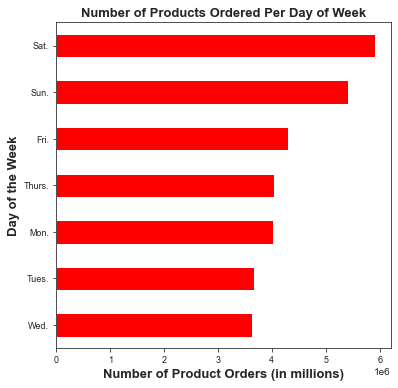

In [42]:
# Histograph of how many products were ordered during certain days of the week.
# More ordered products take place on weekends.

bar_1 = df_merged_complete['order_day_of_week'].value_counts().sort_values().plot.barh(figsize = (6,6), color = 'red')
sns.set_style('ticks')
plt.xlabel('Number of Product Orders (in millions)',fontsize=13, fontweight = 'bold')
plt.ylabel('Day of the Week',fontsize=13, fontweight = 'bold')
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.title('Number of Products Ordered Per Day of Week',fontsize=13, fontweight = 'bold')
plt.show()

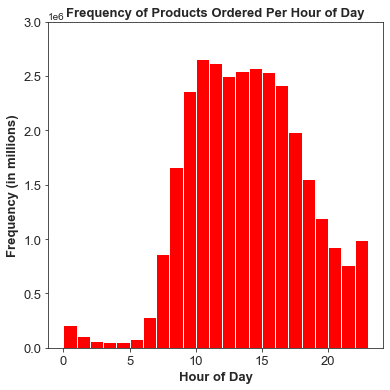

In [43]:
# Histograph of how many products were ordered during hours of the day.
# More ordered products take place in the late morning to evening between 9 AM and 5 PM

hist_hour = df_merged_complete['order_hour_of_day'].plot.hist(bins = 23, figsize = (6,6), color = 'red')
sns.set_style('ticks')
plt.xlabel('Hour of Day',fontsize=13, fontweight = 'bold')
plt.ylabel('Frequency (in millions)',fontsize=13, fontweight = 'bold')
plt.xticks(fontsize=13)
y_ticks = np.arange(0, 3100000, 500000)
plt.yticks(y_ticks, fontsize=13)
plt.title('Frequency of Products Ordered Per Hour of Day',fontsize=13, fontweight = 'bold')
plt.show()


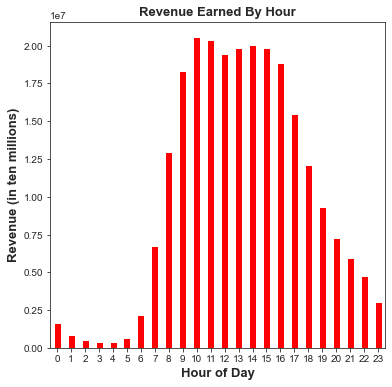

In [44]:
# Histograph of how many products were ordered during certain times of the day.
# More ordered products take place in the late morning to evening between 9 AM and 5 PM

hour_revenue = df_merged_complete.groupby('order_hour_of_day')['prices'].sum().plot.bar(figsize = (6,6), color = 'red')
sns.set_style('ticks')
plt.xlabel('Hour of Day',fontsize=13, fontweight = 'bold')
plt.ylabel('Revenue (in ten millions)',fontsize=13, fontweight = 'bold')
plt.xticks(fontsize = 10, rotation = 0)
plt.yticks(fontsize = 10)
plt.title('Revenue Earned By Hour',fontsize=13, fontweight = 'bold')
plt.show()



# 10) Analysis on distribution on orders and customers' ordering habits

Text(0.5, 1.0, 'Distribution of Products Orders by Type of Loyal Customer')

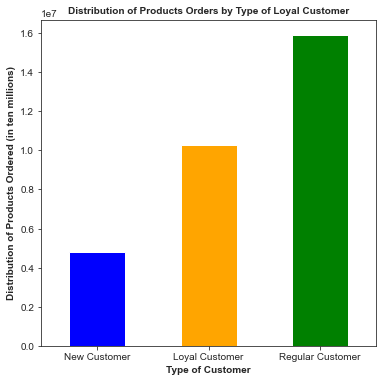

In [45]:
# Plotting horizontal bar graph for number of orders made by type of loyally customer
# Shows more ordered products came from regular customers

orders_type_customer = df_merged_complete['loyalty_flag'].value_counts().sort_values().plot.bar(figsize = (6,6), color = ['blue', 'orange', 'green'])
sns.set_style('ticks')
plt.xlabel('Type of Customer', fontsize = 10, fontweight = 'bold')
plt.ylabel('Distribution of Products Ordered (in ten millions)', fontsize = 10, fontweight = 'bold')
plt.xticks(fontsize = 10, rotation = 0)
plt.yticks(fontsize = 10)
plt.title('Distribution of Products Orders by Type of Loyal Customer', fontsize = 10, fontweight = 'bold')

In [46]:
# Created a subset of dataframe to study individual customer's ordering habits labeled by df_merged_subset

df_merged_subset = df_merged_complete[['user_id', 'loyalty_flag', 'type_of_spender','type_of_customer','Region', 'Type of Adult']]
df_merged_subset.drop_duplicates(inplace = True)
df_merged_subset

/Users/matthewabrams/opt/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,user_id,loyalty_flag,type_of_spender,type_of_customer,Region,Type of Adult
0,1,New Customer,Low spender,Semi-frequent customer,South,Married Working Class Adult
13,15,Regular Customer,Low spender,Frequent customer,Midwest,Divorced/Widowed Middle Class Adult
33,19,New Customer,Low spender,Frequent customer,South,Married Upper Class Adult
59,21,Regular Customer,Low spender,Frequent customer,West,Divorced/Widowed Upper Class Adult
109,31,Regular Customer,Low spender,Frequent customer,South,Married Middle Class Adult
...,...,...,...,...,...,...
30355419,157447,New Customer,Low spender,Non-frequent customer,South,Single Working Class Adult
30355435,95228,New Customer,Low spender,Frequent customer,South,Married Working Class Adult
30355442,162836,New Customer,Low spender,Semi-frequent customer,South,Married Working Class Adult
30355449,105857,New Customer,High spender,Frequent customer,West,Married Working Class Adult


In [47]:
# Returned the proportion of different types of adults
# Majority of Instacart customers are of marital status and higher income (upper class and middle class)

(df_merged_subset['Type of Adult'].value_counts() / len(df_merged_subset['Type of Adult'])).astype(float).round(2)

Married Upper Class Adult               0.32
Married Middle Class Adult              0.27
Married Working Class Adult             0.11
Single Middle Class Adult               0.09
Divorced/Widowed Upper Class Adult      0.06
Single Upper Class Adult                0.05
Dependant Middle Class Adult            0.04
Single Working Class Adult              0.03
Divorced/Widowed Middle Class Adult     0.02
Divorced/Widowed Working Class Adult    0.01
Dependant Working Class Adult           0.01
Dependant Upper Class Adult             0.00
Name: Type of Adult, dtype: float64

Text(0.5, 1.0, 'Number of Orders Made From Top 5 Type of Adults')

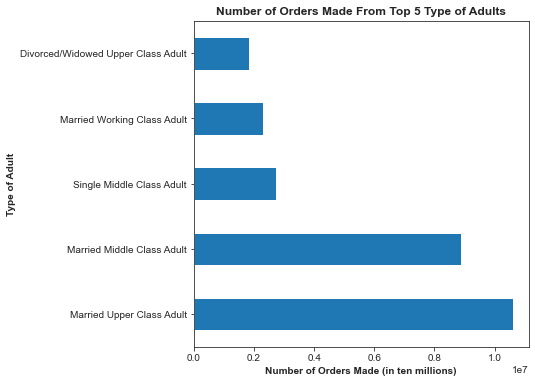

In [48]:
# Counted the number of orders made by different types of adults
# Majority of orders are made by customers of marital status and higher income (upper class and middle class)

type_of_adult_orders = df_merged_complete['Type of Adult'].value_counts(dropna = False).nlargest(5).plot.barh(figsize = (6,6))
sns.set_style('ticks')
plt.xlabel('Number of Orders Made (in ten millions)', fontsize = 10, fontweight = 'bold')
plt.ylabel('Type of Adult', fontsize = 10, fontweight = 'bold')
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.title('Number of Orders Made From Top 5 Type of Adults', fontsize = 12, fontweight = 'bold')

Text(0.5, 1.0, 'Type of Customers Regarding Consistency')

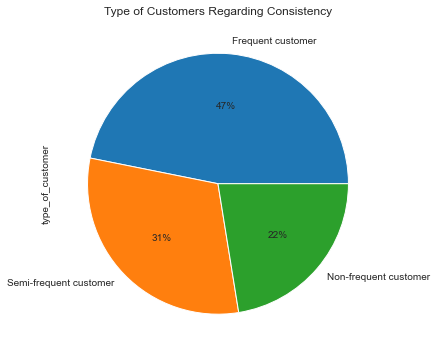

In [49]:
# Pie chart of type of frequent customers individually
# Almost half of customers return to shop online every 10 days or less (frequent customers)

customer_frequent = df_merged_subset['type_of_customer'].value_counts().plot.pie(figsize = (6,6), autopct = '%1.0f%%')
plt.title('Type of Customers Regarding Consistency')

In [50]:
# Checking ordering habits by Region

In [51]:
(df_merged_subset[df_merged_subset['Region'] == 'Midwest']['type_of_customer'].value_counts() / len(df_merged_subset[df_merged_subset['Region'] == 'Midwest'])).round(2)

Frequent customer         0.47
Semi-frequent customer    0.31
Non-frequent customer     0.23
Name: type_of_customer, dtype: float64

In [52]:
(df_merged_subset[df_merged_subset['Region'] == 'South']['type_of_customer'].value_counts() / len(df_merged_subset[df_merged_subset['Region'] == 'South'])).round(2)

Frequent customer         0.47
Semi-frequent customer    0.31
Non-frequent customer     0.23
Name: type_of_customer, dtype: float64

In [53]:
(df_merged_subset[df_merged_subset['Region'] == 'Northeast']['type_of_customer'].value_counts() / len(df_merged_subset[df_merged_subset['Region'] == 'Northeast'])).round(2)

Frequent customer         0.47
Semi-frequent customer    0.31
Non-frequent customer     0.22
Name: type_of_customer, dtype: float64

In [54]:
(df_merged_subset[df_merged_subset['Region'] == 'West']['type_of_customer'].value_counts() / len(df_merged_subset[df_merged_subset['Region'] == 'West'])).round(2)

Frequent customer         0.47
Semi-frequent customer    0.30
Non-frequent customer     0.22
Name: type_of_customer, dtype: float64

In [55]:
# Ratio of frequent to semi-frequent to non-frequent customers remain the same in all regions

Text(0.5, 1.0, 'Loyalty Type Customer')

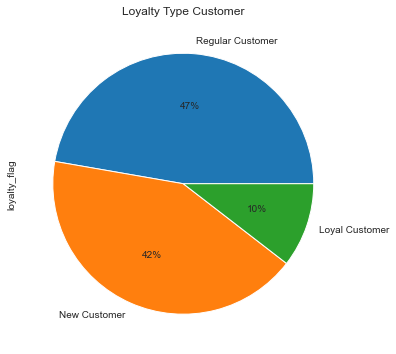

In [56]:
# Pie chart regarding loyalty type of customers individually
# Almost half of all people who shop on Instacart are regular customers, those who've made more than 10 orders, but 40 or less
# Loyal customers make up a small percentage of all IC customers in comparison to regular and new customers

loyalty_type = df_merged_subset['loyalty_flag'].value_counts().plot.pie(figsize = (6,6), autopct = '%1.0f%%')
plt.title('Loyalty Type Customer')

In [57]:
# Checking loyalty status of customer by region

In [58]:
(df_merged_subset[df_merged_subset['Region'] == 'Midwest']['loyalty_flag'].value_counts() / len(df_merged_subset[df_merged_subset['Region'] == 'Midwest'])).round(2)

Regular Customer    0.47
New Customer        0.42
Loyal Customer      0.10
Name: loyalty_flag, dtype: float64

In [59]:
(df_merged_subset[df_merged_subset['Region'] == 'Northeast']['loyalty_flag'].value_counts() / len(df_merged_subset[df_merged_subset['Region'] == 'Northeast'])).round(2)

Regular Customer    0.47
New Customer        0.42
Loyal Customer      0.11
Name: loyalty_flag, dtype: float64

In [60]:
(df_merged_subset[df_merged_subset['Region'] == 'West']['loyalty_flag'].value_counts() / len(df_merged_subset[df_merged_subset['Region'] == 'West'])).round(2)

Regular Customer    0.47
New Customer        0.42
Loyal Customer      0.11
Name: loyalty_flag, dtype: float64

In [61]:
(df_merged_subset[df_merged_subset['Region'] == 'South']['loyalty_flag'].value_counts() / len(df_merged_subset[df_merged_subset['Region'] == 'South'])).round(2)

Regular Customer    0.47
New Customer        0.42
Loyal Customer      0.10
Name: loyalty_flag, dtype: float64

In [62]:
# Ratio of regular to new to loyal customers remain the same in all regions

Text(0.5, 1.0, 'Number of Orders Made From Customers')

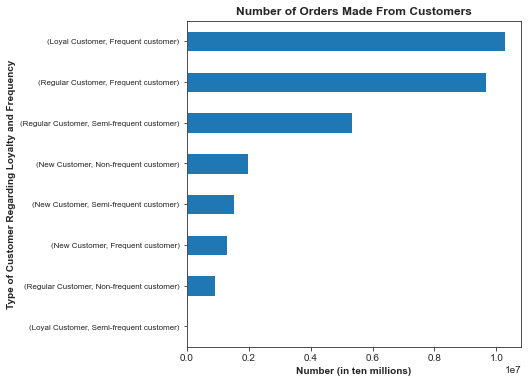

In [63]:
# Bar graph based on above info

loyalty_type_orders_bar = df_merged_complete.groupby('loyalty_flag')['type_of_customer'].value_counts().sort_values().plot.barh(figsize = (6,6))
sns.set_style('ticks')
plt.xlabel('Number (in ten millions)', fontsize = 10, fontweight = 'bold')
plt.ylabel('Type of Customer Regarding Loyalty and Frequency', fontsize = 10, fontweight = 'bold')
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 8)
plt.title('Number of Orders Made From Customers', fontsize = 12, fontweight = 'bold')

In [64]:
# Return the proportion of number of frequent customers grouped by loyalty status

In [65]:
# Nearly all loyal customers shop frequently

(df_merged_subset[df_merged_subset['loyalty_flag'] == 'Loyal Customer']['type_of_customer'].value_counts() / len(df_merged_subset[df_merged_subset['loyalty_flag'] == 'Loyal Customer'])).astype(float).round(4) 

Frequent customer         0.9995
Semi-frequent customer    0.0005
Name: type_of_customer, dtype: float64

In [66]:
# About half of all regular customers shop frequently

(df_merged_subset[df_merged_subset['loyalty_flag'] == 'Regular Customer']['type_of_customer'].value_counts() / len(df_merged_subset[df_merged_subset['loyalty_flag'] == 'Regular Customer'])).astype(float).round(2) 

Frequent customer         0.53
Semi-frequent customer    0.38
Non-frequent customer     0.09
Name: type_of_customer, dtype: float64

In [67]:
# Majority of new customers are non-frequent shoppers. Opportunity to get new customers to shop frequently.

(df_merged_subset[df_merged_subset['loyalty_flag'] == 'New Customer']['type_of_customer'].value_counts() / len(df_merged_subset[df_merged_subset['loyalty_flag'] == 'New Customer'])).astype(float).round(2) 

Non-frequent customer     0.43
Semi-frequent customer    0.30
Frequent customer         0.27
Name: type_of_customer, dtype: float64

# 11) Crosstabs of columns

In [68]:
# Crosstab of two columns of dataframe: Age and Price

crosstab = pd.crosstab(df_merged_complete['Age'], df_merged_complete['prices'], dropna = False)
crosstab.to_clipboard()

# 12) Exporting final dataframe and visualizations

In [70]:
scatter.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'Final Draft', 'income_vs_age_scatter.png'))
scatter_1.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'Final Draft', 'average_price_vs_age_scatter.png'))
top_5_depart.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'Final Draft', 'top_five_departments_bar.png'))
bar_1.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'Final Draft', 'orders_day_of_week_bar.png'))
hist_hour.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'Final Draft', 'orders_hour_of_day_bar.png'))
hour_revenue.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'Final Draft', 'hour_revenue_bar.png'))
customer_frequent.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'Final Draft', 'type_of_customers_piechart.png'))
loyalty_type.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'Final Draft', 'loyalty_customers_piechart.png'))
loyalty_type_orders_bar.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'Final Draft', 'loyalty_type_orders_bar.png'))
type_of_adult_orders.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'Final Draft', 'adults_order_bar.png'))
df_merged_complete.to_pickle(os.path.join(path, 'Data','Prepared Data','instacart_final.pkl'))
